# Exploratory Data Analysis on Microsoft Stocks
#### By Vedant Thakur

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [128]:
#For Interactive Charts
import plotly.graph_objects as go

In [ ]:
pd.set_option('display.float_format', '{:.10f}'.format)
data1 = pd.read_csv('Microsoft_stock_history.csv')
data2 = pd.read_csv('Microsoft_stock_info.csv')
data3 = pd.read_csv('Microsoft_stock_spilts.csv')
data4 = pd.read_csv('Microsoft_stock_dividends.csv')
data5 = pd.read_csv('Microsoft_stock_action.csv')

In [49]:
data1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.0560007664,0.0642362475,0.0560007664,0.0614906661,1031788800,0.0000000000,0.0000000000
1,1986-03-14,0.0614906499,0.0647852204,0.0614906499,0.0636866093,308160000,0.0000000000,0.0000000000
2,1986-03-17,0.0636866013,0.0653342020,0.0636866013,0.0647852123,133171200,0.0000000000,0.0000000000
3,1986-03-18,0.0647852217,0.0653342115,0.0625886308,0.0631376207,67766400,0.0000000000,0.0000000000
4,1986-03-19,0.0631376308,0.0636866208,0.0614906610,0.0620396510,47894400,0.0000000000,0.0000000000


In [50]:
data2.head()

,zip,98052-6399
0,sector,Technology
1,fullTimeEmployees,181000
2,longBusinessSummary,"Microsoft Corporation develops, licenses, and ..."
3,city,Redmond
4,phone,425 882 8080


In [51]:
data3.head()

,Date,Stock Splits
0,1987-09-21,2.0000000000
1,1990-04-16,2.0000000000
2,1991-06-27,1.5000000000
3,1992-06-15,1.5000000000
4,1994-05-23,2.0000000000


In [52]:
data4.head()

,Date,Dividends
0,2003-02-19,0.0800000000
1,2003-10-15,0.1600000000
2,2004-08-23,0.0800000000
3,2004-11-15,3.0800000000
4,2005-02-15,0.0800000000


In [53]:
data5.head()

,Date,Dividends,Stock Splits
0,1987-09-21,0.0000000000,2.0000000000
1,1990-04-16,0.0000000000,2.0000000000
2,1991-06-27,0.0000000000,1.5000000000
3,1992-06-15,0.0000000000,1.5000000000
4,1994-05-23,0.0000000000,2.0000000000


In [54]:
combined_data = pd.concat([data1,data2,data3,data4,data5], ignore_index=True, sort=False)
combined_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,zip,98052-6399
0,1986-03-13,0.0560007664,0.0642362475,0.0560007664,0.0614906661,1031788800.0000000000,0.0000000000,0.0000000000,NaN,NaN
1,1986-03-14,0.0614906499,0.0647852204,0.0614906499,0.0636866093,308160000.0000000000,0.0000000000,0.0000000000,NaN,NaN
2,1986-03-17,0.0636866013,0.0653342020,0.0636866013,0.0647852123,133171200.0000000000,0.0000000000,0.0000000000,NaN,NaN
3,1986-03-18,0.0647852217,0.0653342115,0.0625886308,0.0631376207,67766400.0000000000,0.0000000000,0.0000000000,NaN,NaN
4,1986-03-19,0.0631376308,0.0636866208,0.0614906610,0.0620396510,47894400.0000000000,0.0000000000,0.0000000000,NaN,NaN


In [56]:
combined_data.shape

(9266, 10)

In [57]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9266 entries, 0 to 9265
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9116 non-null   object 
 1   Open          8956 non-null   float64
 2   High          8956 non-null   float64
 3   Low           8956 non-null   float64
 4   Close         8956 non-null   float64
 5   Volume        8956 non-null   float64
 6   Dividends     9107 non-null   float64
 7   Stock Splits  9045 non-null   float64
 8   zip           150 non-null    object 
 9   98052-6399    116 non-null    object 
dtypes: float64(7), object(3)
memory usage: 724.0+ KB


In [58]:
combined_data.isnull().sum()

Date             150
Open             310
High             310
Low              310
Close            310
Volume           310
Dividends        159
Stock Splits     221
zip             9116
98052-6399      9150
dtype: int64

The zip and 98052-6399 columns have too many null values as compare to others and we can remove it

In [63]:
combined_data = combined_data.drop(columns=['zip','98052-6399'])

In [64]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9266 entries, 0 to 9265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9116 non-null   object 
 1   Open          8956 non-null   float64
 2   High          8956 non-null   float64
 3   Low           8956 non-null   float64
 4   Close         8956 non-null   float64
 5   Volume        8956 non-null   float64
 6   Dividends     9107 non-null   float64
 7   Stock Splits  9045 non-null   float64
dtypes: float64(7), object(1)
memory usage: 579.3+ KB


In [65]:
combined_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,8956.0000000000,8956.0000000000,8956.0000000000,8956.0000000000,8956.0000000000,9107.0000000000,9045.0000000000
mean,32.4601645891,32.7925834387,32.1242680042,32.4720129772,59131909.1447074562,0.0070462282,0.0056384743
std,50.7413073536,51.2140654821,50.2623094206,50.7725182864,38560431.9792996570,0.0721326044,0.1036765747
min,0.0560007664,0.0581967086,0.0560007664,0.0570987351,2304000.0000000000,0.0000000000,0.0000000000
25%,2.4804937875,2.5101411072,2.4594936252,2.4848177433,35113825.0000000000,0.0000000000,0.0000000000
50%,18.7996192232,19.0060323866,18.5806739919,18.7816200256,52379050.0000000000,0.0000000000,0.0000000000
75%,28.1427452444,28.5119228933,27.7948789876,28.1654953957,72971100.0000000000,0.0000000000,0.0000000000
max,305.0199890137,305.8399963379,302.0000000000,305.2200012207,1031788800.0000000000,3.0800000000,2.0000000000


In [ ]:
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

In [69]:
combined_data.duplicated().sum()
combined_data = combined_data.drop_duplicates()
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9117 entries, 0 to 9265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          9116 non-null   datetime64[ns]
 1   Open          8956 non-null   float64       
 2   High          8956 non-null   float64       
 3   Low           8956 non-null   float64       
 4   Close         8956 non-null   float64       
 5   Volume        8956 non-null   float64       
 6   Dividends     9107 non-null   float64       
 7   Stock Splits  9045 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 641.0 KB


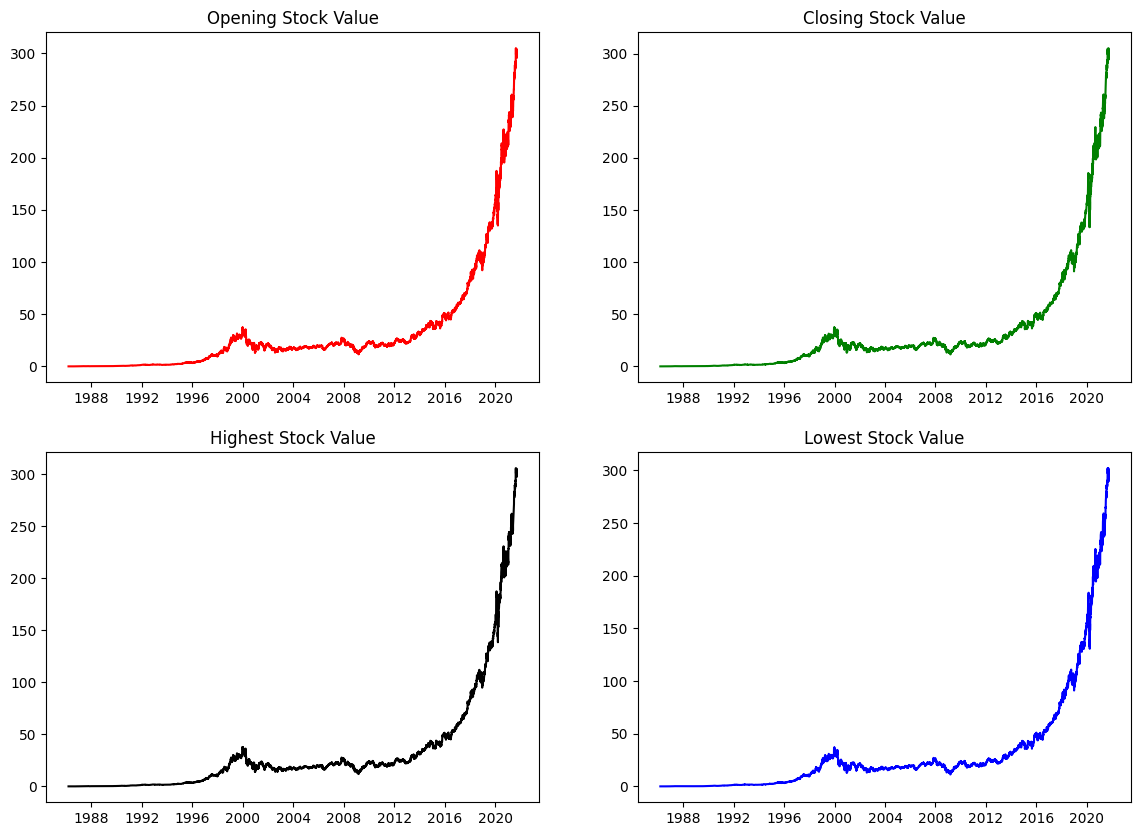

In [101]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(combined_data['Date'], combined_data['Open'], color='red')
plt.title('Opening Stock Value')

plt.subplot(2, 2, 2)
plt.plot(combined_data['Date'], combined_data['Close'], color='green')
plt.title('Closing Stock Value')

plt.subplot(2, 2, 3)
plt.plot(combined_data['Date'], combined_data['High'], color='black')
plt.title('Highest Stock Value')

plt.subplot(2, 2, 4)
plt.plot(combined_data['Date'], combined_data['Low'], color='blue')
plt.title('Lowest Stock Value')

plt.show()

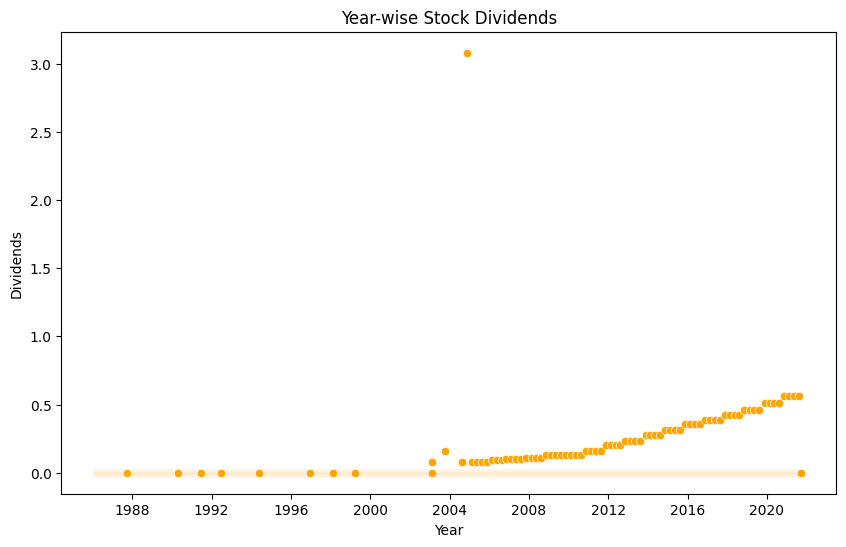

In [88]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Date',y='Dividends', data=combined_data, color='orange')
plt.xlabel('Year')
plt.ylabel('Dividends')
plt.title('Year-wise Stock Dividends')
plt.show()

In [131]:
fig = go.Figure(data=[go.Candlestick(
                x=combined_data['Date'],
                open=combined_data['Open'],
                high=combined_data['High'],
                low=combined_data['Low'],
                close=combined_data['Close'])])
fig.update_layout(title='Candlestick Chart', xaxis_title='Year', yaxis_title='Value')
fig.show()

In [133]:
fig = go.Figure(data=[go.Histogram(x=combined_data['Volume'], marker_color='purple')])
fig.update_layout(title='Histogram', xaxis_title='Value', yaxis_title='Quantity')
fig.show()

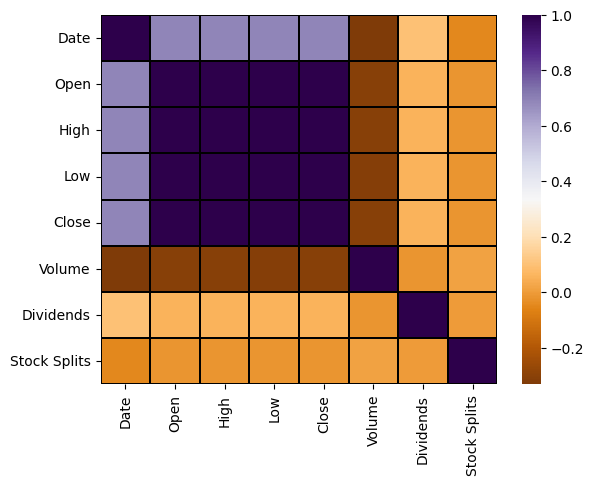

In [146]:
correlation_matrix = combined_data.corr()
sns.heatmap(correlation_matrix, cmap='PuOr', linecolor='black', linewidths=0.1)
plt.show()